In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [31]:
data = pd.read_excel("BCR_New.xlsx", sheet_name="BCR Sheet", index_col=0, header=0)
data.head()

,Date_of_Brachytherapy_f1,Current Meds,Cigarette Smoker,Zubrod,DRE,Prior Cancer,Total Core Biopsies,Type of biopsy,Pos Biopsies,Percent Pos Biopsies,...,Brachytherapy_Centre,Age,Gleason_Grade,Percentage_Positive_Biopsies,Risk_Status,Status_of_this_Visit,BCR,BCR_Time_Months,BCR_Time_Year,BCR_Binned
internalid,,,,,,,,,,,,,,,,,,,,,
2048356C,2013-05-02,2,2,0,0,1,6,1,3,50.00,...,1,66,2,50,2,1,No,9.223372e+18,5,5
F3F1F587,2015-06-10,2,2,0,0,1,14,1,1,7.14,...,1,64,1,7,1,1,No,9.223372e+18,4,5
922303E,2011-11-17,2,2,9,2,2,10,1,1,10.00,...,1,76,2,10,2,1,No,9.223372e+18,6,10
883F5E4E,2015-02-27,2,2,0,0,1,13,1,2,15.38,...,1,62,1,15,1,1,No,9.223372e+18,0,5
9DF41142,2015-02-13,2,2,0,0,1,14,1,1,7.14,...,1,62,1,7,1,1,No,9.223372e+18,5,5


In [32]:
set(data.loc[data["BCR"]=="No"]["BCR_Time_Months"])

{9.22337203685477e+18}

In [33]:
mask = data.BCR_Time_Months > 20000
data.loc[mask, "BCR_Binned"] = -1

In [34]:
data.columns

Index(['Date_of_Brachytherapy_f1', 'Current Meds', 'Cigarette Smoker',
       'Zubrod', 'DRE', 'Prior Cancer', 'Total Core Biopsies',
       'Type of biopsy', 'Pos Biopsies', 'Percent Pos Biopsies',
       'Primary Score - Gleason', 'Secondary Score - Gleason',
       'Gleason Score overall', 'Perineural Invasion', 'Baseline PSA Value',
       'Tumor Palpable', 'Seminal Vesicle Invasion', 'T Stage', 'N Stage',
       'M Stage', 'CT Abdomen/Pelvis', 'MRI Abdomen/Pelvis',
       'D'Amico Risk Category', 'Bone Scan', 'Treatment',
       'Brachytherapy_Total_Dose_Received', 'Brachytherapy_Centre', 'Age',
       'Gleason_Grade', 'Percentage_Positive_Biopsies', 'Risk_Status',
       'Status_of_this_Visit', 'BCR', 'BCR_Time_Months', 'BCR_Time_Year',
       'BCR_Binned'],
      dtype='object')

In [35]:
set(data["DRE"])

{0, 1, 2}

In [36]:
data["Baseline PSA Value"] =  np.log2(data["Baseline PSA Value"].values)

In [37]:
data["BCR"] = data["BCR"].replace({"Yes": 1, "No": 0})
data

,Date_of_Brachytherapy_f1,Current Meds,Cigarette Smoker,Zubrod,DRE,Prior Cancer,Total Core Biopsies,Type of biopsy,Pos Biopsies,Percent Pos Biopsies,...,Brachytherapy_Centre,Age,Gleason_Grade,Percentage_Positive_Biopsies,Risk_Status,Status_of_this_Visit,BCR,BCR_Time_Months,BCR_Time_Year,BCR_Binned
internalid,,,,,,,,,,,,,,,,,,,,,
2048356C,2013-05-02,2,2,0,0,1,6,1,3,50.00,...,1,66,2,50,2,1,0,9.223372e+18,5,-1
F3F1F587,2015-06-10,2,2,0,0,1,14,1,1,7.14,...,1,64,1,7,1,1,0,9.223372e+18,4,-1
922303E,2011-11-17,2,2,9,2,2,10,1,1,10.00,...,1,76,2,10,2,1,0,9.223372e+18,6,-1
883F5E4E,2015-02-27,2,2,0,0,1,13,1,2,15.38,...,1,62,1,15,1,1,0,9.223372e+18,0,-1
9DF41142,2015-02-13,2,2,0,0,1,14,1,1,7.14,...,1,62,1,7,1,1,0,9.223372e+18,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65ED7615,2015-03-13,1,1,0,0,0,15,1,1,6.67,...,1,69,4,6,3,1,0,9.223372e+18,5,-1
DE21A6C5,2016-10-28,1,1,0,0,1,16,1,3,18.75,...,1,77,1,18,1,1,0,9.223372e+18,3,-1
6226C1A0,2018-10-12,1,1,0,0,1,14,1,5,35.71,...,1,71,2,35,2,1,0,9.223372e+18,2,-1


In [38]:
data.dtypes

Date_of_Brachytherapy_f1             datetime64[ns]
Current Meds                                  int64
Cigarette Smoker                              int64
Zubrod                                        int64
DRE                                           int64
Prior Cancer                                  int64
Total Core Biopsies                           int64
Type of biopsy                                int64
Pos Biopsies                                  int64
Percent Pos Biopsies                        float64
Primary Score - Gleason                       int64
Secondary Score - Gleason                     int64
Gleason Score overall                         int64
Perineural Invasion                           int64
Baseline PSA Value                          float64
Tumor Palpable                                int64
Seminal Vesicle Invasion                      int64
T Stage                                       int64
N Stage                                       int64
M Stage     

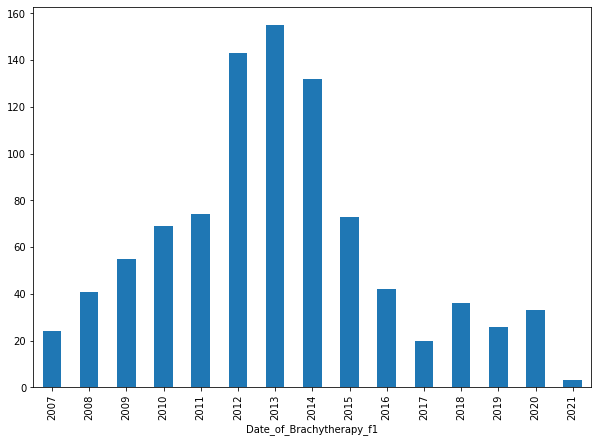

In [39]:
data["Date_of_Brachytherapy_f1"].groupby(data["Date_of_Brachytherapy_f1"].dt.year).count().plot(kind="bar", figsize=(10,7))

In [40]:
#filtering out data until Dec 2014
trunc_data = data.loc[data["Date_of_Brachytherapy_f1"] <"2015-01-01"]
trunc_data

,Date_of_Brachytherapy_f1,Current Meds,Cigarette Smoker,Zubrod,DRE,Prior Cancer,Total Core Biopsies,Type of biopsy,Pos Biopsies,Percent Pos Biopsies,...,Brachytherapy_Centre,Age,Gleason_Grade,Percentage_Positive_Biopsies,Risk_Status,Status_of_this_Visit,BCR,BCR_Time_Months,BCR_Time_Year,BCR_Binned
internalid,,,,,,,,,,,,,,,,,,,,,
2048356C,2013-05-02,2,2,0,0,1,6,1,3,50.00,...,1,66,2,50,2,1,0,9.223372e+18,5,-1
922303E,2011-11-17,2,2,9,2,2,10,1,1,10.00,...,1,76,2,10,2,1,0,9.223372e+18,6,-1
37915CB3,2010-12-08,2,2,0,0,1,12,1,1,8.33,...,1,60,1,8,1,1,0,9.223372e+18,3,-1
21D65521,2011-04-21,2,2,0,1,1,14,1,6,42.86,...,1,63,3,42,2,4,1,8.000000e+01,6,10
10B41FFA,2009-12-17,2,2,0,0,1,6,1,3,50.00,...,1,53,1,50,1,1,0,9.223372e+18,4,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494EFD93,2014-12-04,1,1,0,0,1,14,1,3,21.43,...,1,66,2,21,2,1,0,9.223372e+18,0,-1
34EE9A26,2010-07-30,1,1,0,2,1,10,1,3,30.00,...,1,63,3,30,2,1,0,9.223372e+18,5,-1
FD30A02,2010-05-12,1,1,0,1,1,18,1,4,22.22,...,1,68,4,22,3,5,1,7.100000e+01,5,5


# Execution

In [41]:
from imblearn.combine import SMOTEENN
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import joblib


from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

In [42]:
#list of informative features

# cols = [
#     "Current Meds", "Prior Cancer", "Total Core Biopsies", "Pos Biopsies",
#     "Percent Pos Biopsies", "Gleason Score overall", "Perineural Invasion",
#     "Baseline PSA Value", "T Stage", "D'Amico Risk Category", "Treatment",
#     "Age", "Gleason_Grade", "Percentage_Positive_Biopsies"
# ]

cols = [
    "Current Meds", "Prior Cancer", "Percent Pos Biopsies", "Perineural Invasion",
    "Baseline PSA Value", "T Stage", "D'Amico Risk Category", "Treatment",
    "Age", "Gleason_Grade",
]

In [43]:
X = trunc_data[cols].copy()
y = trunc_data["BCR_Binned"].values #the target
trunc_data[cols]

,Current Meds,Prior Cancer,Percent Pos Biopsies,Perineural Invasion,Baseline PSA Value,T Stage,D'Amico Risk Category,Treatment,Age,Gleason_Grade
internalid,,,,,,,,,,
2048356C,2,1,50.00,2,2.321928,2,2,1,66,2
922303E,2,2,10.00,3,2.847997,1,2,2,76,2
37915CB3,2,1,8.33,2,2.400538,1,1,2,60,1
21D65521,2,1,42.86,1,2.324811,1,2,4,63,3
10B41FFA,2,1,50.00,2,2.263034,1,1,1,53,1
...,...,...,...,...,...,...,...,...,...,...
494EFD93,1,1,21.43,2,6.209453,1,2,2,66,2
34EE9A26,1,1,30.00,1,3.446256,2,2,4,63,3
FD30A02,1,1,22.22,2,3.169925,1,3,4,68,4


## Resampling using SMOTEENN

In [44]:
smote_enn = SMOTEENN(random_state=1992)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

#splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, shuffle=True, random_state=1992)

## Model execution

In [45]:
#the following are the best parameter settings given by RandomisedSearchCV of a wider parameter grid (around 25000 combinations were tested)

best_params = {'n_estimators': 1860,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'criterion': 'entropy',
 'bootstrap': False}

In [46]:
from sklearn.preprocessing import StandardScaler
#setting the pipeline for the model: Standardscaler and then RandomForestClassifier -- train it then
rfc = Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier(random_state=1992, n_jobs=-1, **best_params))]).fit(X_train,y_train)

In [47]:
y_pred = rfc.predict(X_test) #prediction task

In [48]:
f1_score(y_test, y_pred, average="weighted") #evaluation

0.9715616324771484

## Saving Model


In [49]:
import pickle

pickle_out = open("bcr_model.pkl", mode = "wb") 
pickle.dump(rfc, pickle_out) 
pickle_out.close()

## Sanity check over data from 2015

In [50]:
ho_data = data.loc[data["Date_of_Brachytherapy_f1"] >="2015-01-01"]
ho_data

,Date_of_Brachytherapy_f1,Current Meds,Cigarette Smoker,Zubrod,DRE,Prior Cancer,Total Core Biopsies,Type of biopsy,Pos Biopsies,Percent Pos Biopsies,...,Brachytherapy_Centre,Age,Gleason_Grade,Percentage_Positive_Biopsies,Risk_Status,Status_of_this_Visit,BCR,BCR_Time_Months,BCR_Time_Year,BCR_Binned
internalid,,,,,,,,,,,,,,,,,,,,,
F3F1F587,2015-06-10,2,2,0,0,1,14,1,1,7.14,...,1,64,1,7,1,1,0,9.223372e+18,4,-1
883F5E4E,2015-02-27,2,2,0,0,1,13,1,2,15.38,...,1,62,1,15,1,1,0,9.223372e+18,0,-1
9DF41142,2015-02-13,2,2,0,0,1,14,1,1,7.14,...,1,62,1,7,1,1,0,9.223372e+18,5,-1
16C69902,2018-05-18,2,2,0,2,1,14,1,2,14.29,...,1,71,2,14,2,1,0,9.223372e+18,0,-1
B65BEA3E,2019-04-12,2,2,0,0,1,12,1,5,41.67,...,1,49,1,41,1,1,0,9.223372e+18,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65ED7615,2015-03-13,1,1,0,0,0,15,1,1,6.67,...,1,69,4,6,3,1,0,9.223372e+18,5,-1
DE21A6C5,2016-10-28,1,1,0,0,1,16,1,3,18.75,...,1,77,1,18,1,1,0,9.223372e+18,3,-1
6226C1A0,2018-10-12,1,1,0,0,1,14,1,5,35.71,...,1,71,2,35,2,1,0,9.223372e+18,2,-1


In [51]:
X_ho = ho_data[cols]
y_ho = ho_data["BCR_Binned"].values
X_ho

,Current Meds,Prior Cancer,Percent Pos Biopsies,Perineural Invasion,Baseline PSA Value,T Stage,D'Amico Risk Category,Treatment,Age,Gleason_Grade
internalid,,,,,,,,,,
F3F1F587,2,1,7.14,3,2.232661,4,1,2,64,1
883F5E4E,2,1,15.38,2,2.827819,1,1,1,62,1
9DF41142,2,1,7.14,2,2.459432,4,1,2,62,1
16C69902,2,1,14.29,3,3.053111,4,2,1,71,2
B65BEA3E,2,1,41.67,1,2.000000,1,1,1,49,1
...,...,...,...,...,...,...,...,...,...,...
65ED7615,1,0,6.67,2,3.169925,4,3,4,69,4
DE21A6C5,1,1,18.75,2,3.446256,2,1,1,77,1
6226C1A0,1,1,35.71,3,2.906891,1,2,3,71,2


In [52]:
y_pred = rfc.predict(X_ho)
f1_score(y_ho, y_pred, average="weighted")

0.7491747226872474